<a href="https://colab.research.google.com/github/sarvarshni/CodSoft/blob/main/CodSoft_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully.

--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Missing Values ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket      

/tmp/ipython-input-1-4146184719.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
/tmp/ipython-input-1-4146184719.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   FamilySize  891 non-null    float64
 4   IsAlone     891 non-null    int64  
 5   Sex_male    891 non-null    bool   
 6   Embarked_Q  891 non-null    bool   
 7   Embarked_S  891 non-null    bool   
 8   Title_Miss  891 non-null    bool   
 9   Title_Mr    891 non-null    bool   
 10  Title_Mrs   891 non-null    bool   
 11  Title_Rare  891 non-null    bool   
 12  Pclass_1    891 non-null    bool   
 13  Pclass_2    891 non-null    bool   
 14  Pclass_3    891 non-null    bool   
dtypes: bool(10), float64(3), int64(2)
memory usage: 43.6 KB
   Survived       Age      Fare  FamilySize  IsAlone  Sex_male  Embarked_Q  \
0         0 -0.565736 -0.502445    0.059160        0      T

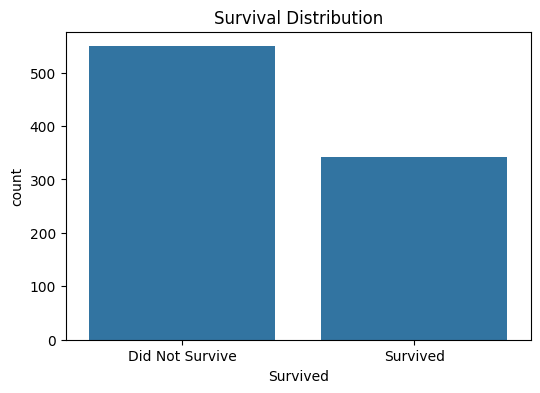

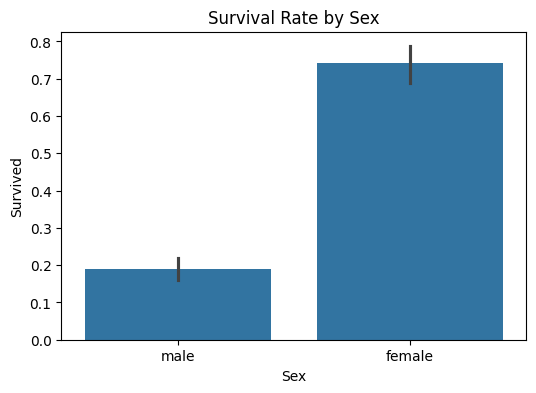

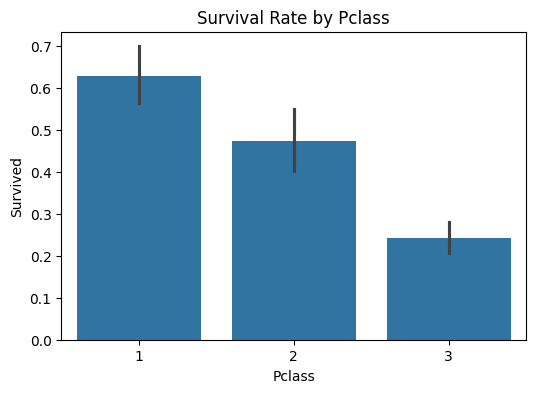

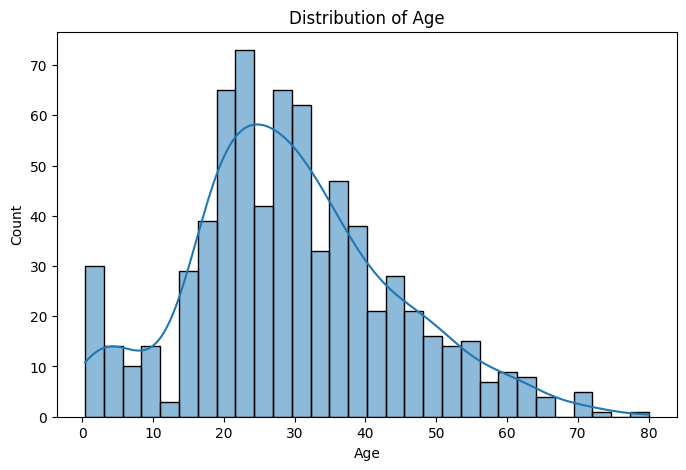

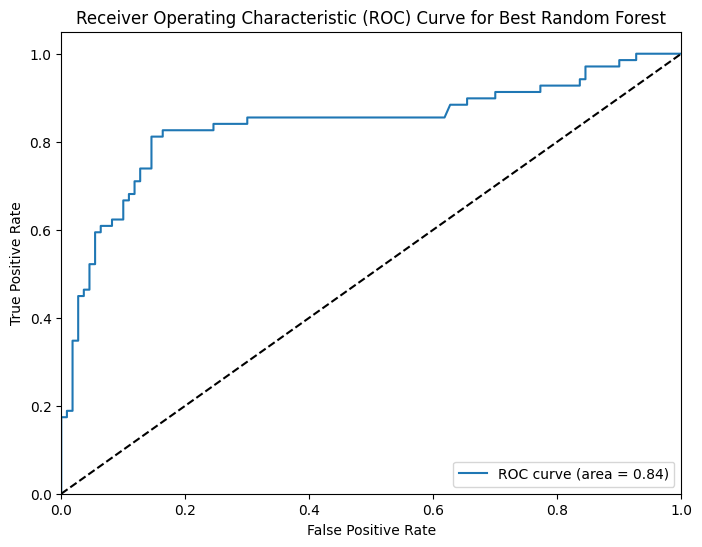

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

try:
    df = pd.read_csv('Titanic-Dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Titanic-Dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

df_processed = df.copy()
print("\n--- Initial Data Info ---")
df_processed.info()
print("\n--- Missing Values ---")
print(df_processed.isnull().sum())
print("\n--- Descriptive Statistics ---")
print(df_processed.describe())
print("\n--- First 5 Rows ---")
print(df_processed.head())

df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0], inplace=True)
df_processed.drop('Cabin', axis=1, inplace=True)
df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1
df_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

df_processed['Title'] = df_processed['Name'].apply(get_title)
df_processed['Title'] = df_processed['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_processed['Title'] = df_processed['Title'].replace('Mlle', 'Miss')
df_processed['Title'] = df_processed['Title'].replace('Ms', 'Miss')
df_processed['Title'] = df_processed['Title'].replace('Mme', 'Mrs')
df_processed.drop(['Name', 'Ticket', 'PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)
df_processed = pd.get_dummies(df_processed, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
df_processed = pd.get_dummies(df_processed, columns=['Pclass'], prefix='Pclass')
numerical_cols = ['Age', 'Fare', 'FamilySize']

scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])


print("\n--- Data after Preprocessing ---")
df_processed.info()
print(df_processed.head())

X = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

results = {}

print("\n--- Model Training and Evaluation ---")
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': conf_matrix
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}" if y_proba is not None else "ROC-AUC: N/A")
    print("Confusion Matrix:\n", conf_matrix)

print("\n--- Hyperparameter Tuning for Random Forest ---")
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_gs = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_gs.fit(X_train, y_train)

best_rf = rf_gs.best_estimator_
print(f"Best Random Forest Parameters: {rf_gs.best_params_}")

y_pred_best_rf = best_rf.predict(X_test)
y_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]

print(f"Best Random Forest Accuracy on Test Set: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(f"Best Random Forest ROC-AUC on Test Set: {roc_auc_score(y_test, y_proba_best_rf):.4f}")

print("\n--- Cross-Validation for Best Random Forest Model ---")
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy (Best RF): {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

import joblib
joblib.dump(best_rf, 'titanic_survival_predictor.pkl')
print("\nBest Random Forest model saved as 'titanic_survival_predictor.pkl'")

print("\n--- Basic Visualizations (EDA Examples) ---")

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')
plt.show()

if y_proba_best_rf is not None:
    fpr, tpr, _ = roc_curve(y_test, y_proba_best_rf)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_proba_best_rf):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Best Random Forest')
    plt.legend(loc="lower right")
    plt.show()